In [1]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from itertools import combinations
import warnings

In [2]:
#import raw training data

df_mode_training_raw = pd.read_csv("datasets//train.csv", low_memory=False)
df_mode_training_raw.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [3]:
#import raw test data

df_mode_test_raw = pd.read_csv("datasets//test.csv", low_memory=False)
df_mode_test_raw.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,114982,2012-11,YISHUN,4 ROOM,173,YISHUN AVE 7,07 TO 09,84.0,Simplified,1987,...,92,0,1.433681,103.832924,156.322353,Ahmad Ibrahim Secondary School,218,0,1.436235,103.829987
1,95653,2019-08,JURONG WEST,5 ROOM,986C,JURONG WEST ST 93,04 TO 06,112.0,Premium Apartment,2008,...,45,0,1.339244,103.698896,739.371688,Jurong West Secondary School,199,0,1.335256,103.702098
2,40303,2013-10,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,...,36,0,1.371893,103.851811,305.071191,Anderson Secondary School,245,0,1.374242,103.851430
3,109506,2017-10,WOODLANDS,4 ROOM,29,MARSILING DR,01 TO 03,97.0,New Generation,1979,...,54,0,1.434423,103.773698,433.454591,Woodlands Secondary School,188,0,1.439183,103.774499
4,100149,2016-08,BUKIT BATOK,4 ROOM,170,BT BATOK WEST AVE 8,16 TO 18,103.0,Model A,1985,...,40,0,1.349195,103.741000,217.295361,Bukit Batok Secondary School,223,0,1.348351,103.740873


In [4]:
# Get a summary of missing values for each column for training data
missing_training_data_summary = df_mode_training_raw.isnull().sum()

# To display all columns and their corresponding missing values:
pd.set_option('display.max_rows', None)  # Show all rows
print(missing_training_data_summary)

# Reset the display option to its default value (optional)
pd.reset_option('display.max_rows')

id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
resale_price                     0
Tranc_Year                       0
Tranc_Month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
price_per_sqft                   0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
residential                      0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion   

In [5]:
# Get a summary of missing values for each column for training data
missing_test_data_summary = df_mode_test_raw.isnull().sum()

# To display all columns and their corresponding missing values:
pd.set_option('display.max_rows', None)  # Show all rows
print(missing_test_data_summary)

# Reset the display option to its default value (optional)
pd.reset_option('display.max_rows')

id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
Tranc_Year                       0
Tranc_Month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
price_per_sqft                   0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
residential                      0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion                0
total_dwelling_units

In [6]:
# Summary statistics for numeric columns for training data
train_numeric_summary = df_mode_training_raw.describe()

# Iterate through columns and perform checks
for column in df_mode_training_raw.columns:
    # Check for missing values
    missing_count = df_mode_training_raw[column].isnull().sum()
    
    # Check data type
    data_type = df_mode_training_raw[column].dtype
    
    # Print unique values for non-numeric (categorical) columns
    if data_type == 'object':
        unique_values = df_mode_training_raw[column].unique()
        print(f"Column '{column}':")
        print(f"Missing Values: {missing_count}")
        print(f"Data Type: {data_type}")
        print(f"Unique Values: {unique_values}")
    else:
        print(f"Column '{column}':")
        print(f"Missing Values: {missing_count}")
        print(f"Data Type: {data_type}")
    
    print("=" * 30)  # Separating lines for clarity

# Visual inspection of the first 10 rows
train_sample_data = df_mode_training_raw.head(10)

# Display the summary statistics for numeric columns
print("Summary Statistics:")
print(train_numeric_summary)

# Display the sample data
print("\nSample Data:")
print(train_sample_data)

Column 'id':
Missing Values: 0
Data Type: int64
Column 'Tranc_YearMonth':
Missing Values: 0
Data Type: object
Unique Values: ['2016-05' '2012-07' '2013-07' '2012-04' '2017-12' '2013-01' '2018-05'
 '2012-03' '2020-01' '2014-06' '2013-06' '2018-03' '2017-07' '2015-08'
 '2019-10' '2018-01' '2020-11' '2015-12' '2017-08' '2015-07' '2019-04'
 '2019-08' '2020-06' '2020-07' '2017-09' '2016-03' '2012-11' '2012-12'
 '2018-11' '2013-04' '2020-12' '2019-03' '2017-04' '2016-12' '2021-04'
 '2012-10' '2014-07' '2018-04' '2017-01' '2015-04' '2012-06' '2013-08'
 '2019-07' '2017-02' '2020-08' '2017-10' '2020-10' '2015-01' '2020-02'
 '2019-01' '2019-09' '2016-06' '2016-08' '2018-12' '2018-07' '2015-03'
 '2012-05' '2014-04' '2014-09' '2014-12' '2015-09' '2017-11' '2020-03'
 '2015-06' '2012-09' '2014-11' '2014-05' '2021-01' '2012-08' '2016-04'
 '2013-05' '2016-02' '2016-01' '2018-02' '2014-10' '2021-02' '2017-06'
 '2014-03' '2018-06' '2019-02' '2020-04' '2021-03' '2016-09' '2019-11'
 '2016-11' '2015-02' '2

Column 'market_hawker':
Missing Values: 0
Data Type: object
Unique Values: ['N' 'Y']
Column 'multistorey_carpark':
Missing Values: 0
Data Type: object
Unique Values: ['N' 'Y']
Column 'precinct_pavilion':
Missing Values: 0
Data Type: object
Unique Values: ['N' 'Y']
Column 'total_dwelling_units':
Missing Values: 0
Data Type: int64
Column '1room_sold':
Missing Values: 0
Data Type: int64
Column '2room_sold':
Missing Values: 0
Data Type: int64
Column '3room_sold':
Missing Values: 0
Data Type: int64
Column '4room_sold':
Missing Values: 0
Data Type: int64
Column '5room_sold':
Missing Values: 0
Data Type: int64
Column 'exec_sold':
Missing Values: 0
Data Type: int64
Column 'multigen_sold':
Missing Values: 0
Data Type: int64
Column 'studio_apartment_sold':
Missing Values: 0
Data Type: int64
Column '1room_rental':
Missing Values: 0
Data Type: int64
Column '2room_rental':
Missing Values: 0
Data Type: int64
Column '3room_rental':
Missing Values: 0
Data Type: int64
Column 'other_room_rental':
Missin

In [7]:
# Convert the 'Tranc_YearMonth' column to datetime format
df_mode_training_raw['Tranc_YearMonth'] = pd.to_datetime(df_mode_training_raw['Tranc_YearMonth'], format='%Y-%m')
df_mode_training_raw.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05-01,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07-01,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07-01,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04-01,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12-01,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [8]:
# List of columns to convert
columns_to_convert = ['residential', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion']

# Loop through each column and replace 'Y' with 1 and 'N' with 0
for column in columns_to_convert:
    df_mode_training_raw[column] = df_mode_training_raw[column].replace({'Y': 1, 'N': 0})
df_mode_training_raw.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05-01,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07-01,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07-01,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04-01,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12-01,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [9]:
# Summary statistics for numeric columns for test data
test_numeric_summary = df_mode_test_raw.describe()

# Iterate through columns and perform checks
for column in df_mode_test_raw.columns:
    # Check for missing values
    missing_count = df_mode_test_raw[column].isnull().sum()
    
    # Check data type
    data_type = df_mode_test_raw[column].dtype
    
    # Print unique values for non-numeric (categorical) columns
    if data_type == 'object':
        unique_values = df_mode_test_raw[column].unique()
        print(f"Column '{column}':")
        print(f"Missing Values: {missing_count}")
        print(f"Data Type: {data_type}")
        print(f"Unique Values: {unique_values}")
    else:
        print(f"Column '{column}':")
        print(f"Missing Values: {missing_count}")
        print(f"Data Type: {data_type}")
    
    print("=" * 30)  # Separating lines for clarity

# Visual inspection of the first 10 rows
test_sample_data = df_mode_test_raw.head(10)

# Display the summary statistics for numeric columns
print("Summary Statistics:")
print(test_numeric_summary)

# Display the sample data
print("\nSample Data:")
print(test_sample_data)

Column 'id':
Missing Values: 0
Data Type: int64
Column 'Tranc_YearMonth':
Missing Values: 0
Data Type: object
Unique Values: ['2012-11' '2019-08' '2013-10' '2017-10' '2016-08' '2016-10' '2013-06'
 '2020-12' '2020-01' '2013-11' '2012-04' '2016-12' '2019-06' '2018-06'
 '2016-01' '2015-08' '2018-07' '2021-03' '2018-01' '2016-04' '2016-02'
 '2017-06' '2013-03' '2021-02' '2019-01' '2017-07' '2020-06' '2014-11'
 '2013-01' '2017-02' '2018-05' '2012-03' '2014-06' '2021-01' '2019-05'
 '2019-07' '2019-11' '2013-12' '2013-09' '2018-04' '2012-07' '2017-11'
 '2015-03' '2016-09' '2013-04' '2017-08' '2019-04' '2018-11' '2014-07'
 '2015-10' '2019-09' '2017-01' '2017-12' '2016-05' '2016-07' '2015-05'
 '2014-02' '2013-02' '2019-02' '2017-09' '2020-05' '2017-03' '2018-03'
 '2014-10' '2016-11' '2015-06' '2012-05' '2019-10' '2013-05' '2018-02'
 '2014-01' '2020-10' '2015-02' '2018-12' '2020-11' '2014-05' '2017-04'
 '2018-10' '2019-12' '2012-10' '2020-02' '2013-08' '2012-09' '2015-07'
 '2013-07' '2017-05' '2

In [10]:
# Convert the 'Tranc_YearMonth' column to datetime format
df_mode_test_raw['Tranc_YearMonth'] = pd.to_datetime(df_mode_training_raw['Tranc_YearMonth'], format='%Y-%m')
df_mode_test_raw.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,114982,2016-05-01,YISHUN,4 ROOM,173,YISHUN AVE 7,07 TO 09,84.0,Simplified,1987,...,92,0,1.433681,103.832924,156.322353,Ahmad Ibrahim Secondary School,218,0,1.436235,103.829987
1,95653,2012-07-01,JURONG WEST,5 ROOM,986C,JURONG WEST ST 93,04 TO 06,112.0,Premium Apartment,2008,...,45,0,1.339244,103.698896,739.371688,Jurong West Secondary School,199,0,1.335256,103.702098
2,40303,2013-07-01,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,...,36,0,1.371893,103.851811,305.071191,Anderson Secondary School,245,0,1.374242,103.851430
3,109506,2012-04-01,WOODLANDS,4 ROOM,29,MARSILING DR,01 TO 03,97.0,New Generation,1979,...,54,0,1.434423,103.773698,433.454591,Woodlands Secondary School,188,0,1.439183,103.774499
4,100149,2017-12-01,BUKIT BATOK,4 ROOM,170,BT BATOK WEST AVE 8,16 TO 18,103.0,Model A,1985,...,40,0,1.349195,103.741000,217.295361,Bukit Batok Secondary School,223,0,1.348351,103.740873


In [11]:
# Suppress DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Your code here
# List of columns to exclude from filling null values
exclude_columns = ['Mall_Nearest_Distance']

# Fill null values with 0 for all columns except those in exclude_columns
df_mode_training_raw.loc[:, ~df_mode_training_raw.columns.isin(exclude_columns)] = df_mode_training_raw.loc[:, ~df_mode_training_raw.columns.isin(exclude_columns)].fillna(0)
df_mode_test_raw.loc[:, ~df_mode_test_raw.columns.isin(exclude_columns)] = df_mode_test_raw.loc[:, ~df_mode_test_raw.columns.isin(exclude_columns)].fillna(0)

In [12]:
#check if any cells are still blank, empty, or null

train_missing_values = df_mode_training_raw.isnull()
train_missing_count = train_missing_values.sum()
train_non_zero_missing = train_missing_count[train_missing_count > 0]
print("Training null columns:")
print(train_non_zero_missing)

test_missing_values = df_mode_test_raw.isnull()
test_missing_count = test_missing_values.sum()
test_non_zero_missing = test_missing_count[test_missing_count > 0]
print("Test null columns:")
print(test_non_zero_missing)

Training null columns:
Mall_Nearest_Distance    829
dtype: int64
Test null columns:
Mall_Nearest_Distance    84
dtype: int64


In [13]:
# Fill missing values with the mean of the non-missing values
training_mean_distance = df_mode_training_raw['Mall_Nearest_Distance'].mean()
df_mode_training_raw['Mall_Nearest_Distance'].fillna(training_mean_distance, inplace=True)
test_mean_distance = df_mode_test_raw['Mall_Nearest_Distance'].mean()
df_mode_test_raw['Mall_Nearest_Distance'].fillna(test_mean_distance, inplace=True)

In [14]:
#check if any cells are still blank, empty, or null

train_missing_values = df_mode_training_raw.isnull()
train_missing_count = train_missing_values.sum()
train_non_zero_missing = train_missing_count[train_missing_count > 0]
print("Training null columns:")
print(train_non_zero_missing)

test_missing_values = df_mode_test_raw.isnull()
test_missing_count = test_missing_values.sum()
test_non_zero_missing = test_missing_count[test_missing_count > 0]
print("Test null columns:")
print(test_non_zero_missing)

Training null columns:
Series([], dtype: int64)
Test null columns:
Series([], dtype: int64)


In [15]:
# Assuming df is your DataFrame
df_train_filled = df_mode_training_raw.fillna(0)  # Fill missing values with 0

# List of columns to convert to binary
binary_columns = ['residential', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion']

# Loop through the binary_columns and convert 'Y' to 1
for col in binary_columns:
    df_train_filled[col] = df_train_filled[col].replace({'Y': 1, 'N': 0, 0: 0})

Interaction term

As HDB mentioned that "proximity to city or town centre" is one of the "factors that impact the market value of a new flat" (HDB, 2023), we are creating an interaction term, **"town_proxy"**, to determine the **squared distance** between the flat and the Singapore River.

The relative distance is derived using the Pythagoras Theorem as follows:

**c^2 = a^2 + b^2**

In this case,

**town_proxy = ((latitude - town_lat) ** 2) + ((longitude - town_long) ** 2) ** 0.5**

Given that the latitude and longitude of Singapore River is as follows:

In [16]:
town_lat = 1.290160
town_long = 103.852000

In [17]:
df_train_filled['town_proxy'] = ((df_train_filled['Latitude'] - town_lat) ** 2) + ((df_train_filled['Longitude'] - town_long) ** 2)

In [18]:
# Assuming df is your DataFrame
df_test_filled = df_mode_test_raw.fillna(0)  # Fill missing values with 0

# List of columns to convert to binary
binary_columns = ['residential', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion']

# Loop through the binary_columns and convert 'Y' to 1
for col in binary_columns:
    df_test_filled[col] = df_test_filled[col].replace({'Y': 1, 'N': 0, 0: 0})

In [19]:
# Assuming df_filled is your new DataFrame
train_description = df_train_filled.describe(include='all', datetime_is_numeric=True)
print(train_description)

                   id                Tranc_YearMonth         town flat_type  \
count   150634.000000                         150634       150634    150634   
unique            NaN                            NaN           26         7   
top               NaN                            NaN  JURONG WEST    4 ROOM   
freq              NaN                            NaN        11451     61136   
mean     93047.887496  2016-12-14 08:10:49.670061056          NaN       NaN   
min          1.000000            2012-03-01 00:00:00          NaN       NaN   
25%      46469.250000            2014-08-01 00:00:00          NaN       NaN   
50%      93077.500000            2017-03-01 00:00:00          NaN       NaN   
75%     139574.750000            2019-05-01 00:00:00          NaN       NaN   
max     185966.000000            2021-04-01 00:00:00          NaN       NaN   
std      53679.906247                            NaN          NaN       NaN   

         block     street_name storey_range  floor_

In [20]:
# Assuming df_filled is your new DataFrame
test_description = df_test_filled.describe(include='all', datetime_is_numeric=True)
print(test_description)

                   id                Tranc_YearMonth         town flat_type  \
count    16737.000000                          16737        16737     16737   
unique            NaN                            NaN           26         7   
top               NaN                            NaN  JURONG WEST    4 ROOM   
freq              NaN                            NaN         1246      6867   
mean     92253.767342  2016-12-17 05:40:37.210969600          NaN       NaN   
min          7.000000            2012-03-01 00:00:00          NaN       NaN   
25%      46550.000000            2014-09-01 00:00:00          NaN       NaN   
50%      91830.000000            2017-04-01 00:00:00          NaN       NaN   
75%     137789.000000            2019-05-01 00:00:00          NaN       NaN   
max     185967.000000            2021-04-01 00:00:00          NaN       NaN   
std      53302.038393                            NaN          NaN       NaN   

        block     street_name storey_range  floor_a

In [21]:
df_train_filled.columns = df_train_filled.columns.str.lower()
df_test_filled.columns = df_test_filled.columns.str.lower()

In [22]:
# Temporarily set the option to display all columns
pd.set_option('display.max_columns', None)

print(df_train_filled)

# Revert to the default display settings
pd.reset_option('display.max_columns')

            id tranc_yearmonth             town         flat_type block  \
0        88471      2016-05-01  KALLANG/WHAMPOA            4 ROOM    3B   
1       122598      2012-07-01           BISHAN            5 ROOM   153   
2       170897      2013-07-01      BUKIT BATOK         EXECUTIVE  289B   
3        86070      2012-04-01           BISHAN            4 ROOM   232   
4       153632      2017-12-01           YISHUN            4 ROOM   876   
...        ...             ...              ...               ...   ...   
150629   39814      2020-09-01        WOODLANDS         EXECUTIVE   849   
150630  147177      2017-06-01      JURONG WEST            5 ROOM  648D   
150631  179087      2020-12-01            BEDOK         EXECUTIVE   639   
150632   21309      2016-05-01       QUEENSTOWN            3 ROOM    32   
150633  185947      2018-06-01           YISHUN  MULTI-GENERATION   666   

               street_name storey_range  floor_area_sqm        flat_model  \
0         UPP BOON KEN

In [23]:
# Temporarily set the option to display all columns
pd.set_option('display.max_columns', None)

print(df_test_filled)

# Revert to the default display settings
pd.reset_option('display.max_columns')

           id tranc_yearmonth           town flat_type block  \
0      114982      2016-05-01         YISHUN    4 ROOM   173   
1       95653      2012-07-01    JURONG WEST    5 ROOM  986C   
2       40303      2013-07-01     ANG MO KIO    3 ROOM   534   
3      109506      2012-04-01      WOODLANDS    4 ROOM    29   
4      100149      2017-12-01    BUKIT BATOK    4 ROOM   170   
...       ...             ...            ...       ...   ...   
16732   23347      2019-01-01     ANG MO KIO    3 ROOM   610   
16733   54003      2021-01-01        PUNGGOL    4 ROOM  305A   
16734  128921      2012-09-01  CHOA CHU KANG    5 ROOM  686D   
16735   69352      2017-04-01         BISHAN    4 ROOM   167   
16736  146210      2016-05-01    JURONG WEST    4 ROOM   152   

               street_name storey_range  floor_area_sqm         flat_model  \
0             YISHUN AVE 7     07 TO 09            84.0         Simplified   
1        JURONG WEST ST 93     04 TO 06           112.0  Premium Apartment 

In [24]:
# Assuming you have a DataFrame named 'df' that you want to save
# Specify the file path where you want to save the CSV file
file_path_train = "datasets//train (cleaned).csv"

# Use the to_csv() method to save the DataFrame to a CSV file
df_train_filled.to_csv(file_path_train, index=False)  # Set index=False to exclude writing row numbers as the first column

In [25]:
# Assuming you have a DataFrame named 'df' that you want to save
# Specify the file path where you want to save the CSV file
file_path_test = "datasets//test (cleaned).csv"

# Use the to_csv() method to save the DataFrame to a CSV file
df_test_filled.to_csv(file_path_test, index=False)  # Set index=False to exclude writing row numbers as the first column

In [26]:
# Assuming your DataFrame is named df
column_names = df_train_filled.columns.tolist()
print(column_names)

['id', 'tranc_yearmonth', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price', 'tranc_year', 'tranc_month', 'mid_storey', 'lower', 'upper', 'mid', 'full_flat_type', 'address', 'floor_area_sqft', 'price_per_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed', 'residential', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental', 'other_room_rental', 'postal', 'latitude', 'longitude', 'planning_area', 'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km', 'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance', 'mrt_name', 'bus_interchange', 'mrt_interchange', 'mrt_lat

Columns to keep plus reasoning

floor_area_sqm: To capture larger unit sizes, including maisonettes.

tranc_year and tranc_month: For analyzing transaction trends.

town: To identify the Bukit Timah area.

flat_type: To categorize unit types, including maisonettes and condos.

storey_range: For understanding floor levels.

floor_area_sqft: Additional unit size information.

mrt_name: To consider proximity to MRT stations.

mrt_interchange: To identify train interchange stations.

mrt_latitude and mrt_longitude: For geographical location.

bus_stop_name: To consider proximity to bus stops.

bus_stop_latitude and bus_stop_longitude: For geographical location.

pri_sch_name: To account for nearby schools.

sec_sch_name: To account for nearby secondary schools.

In [27]:
# Assuming df is your DataFrame and 'columns_to_retain' is a list of column names you want to keep
columns_to_retain = [
    'resale_price', 'floor_area_sqm', 'tranc_year', 'tranc_month', 'town', 'flat_type', 'storey_range',
    'floor_area_sqft', 'mrt_name', 'mrt_interchange', 'mrt_latitude', 'mrt_longitude',
    'bus_stop_name', 'bus_stop_latitude', 'bus_stop_longitude', 'pri_sch_name', 'sec_sch_name'
]
df_train_filled_filtered = df_train_filled[columns_to_retain]

In [28]:
dummified_training_df = pd.get_dummies(df_train_filled_filtered, drop_first = True)

In [29]:
dummified_training_df.head()

,resale_price,floor_area_sqm,tranc_year,tranc_month,floor_area_sqft,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_latitude,bus_stop_longitude,...,sec_sch_name_Xinmin Secondary School,sec_sch_name_Yio Chu Kang Secondary School,sec_sch_name_Yishun Secondary School,sec_sch_name_Yishun Town Secondary School,sec_sch_name_Yuan Ching Secondary School,sec_sch_name_Yuhua Secondary School,sec_sch_name_Yusof Ishak Secondary School,sec_sch_name_Yuying Secondary School,sec_sch_name_Zhenghua Secondary School,sec_sch_name_Zhonghua Secondary School
0,680000.0,90.0,2016,5,968.760,0,1.311540,103.871731,1.314433,103.872600,...,0,0,0,0,0,0,0,0,0,0
1,665000.0,130.0,2012,7,1399.320,1,1.350580,103.848305,1.345659,103.855381,...,0,0,0,0,0,0,0,0,0,0
2,838000.0,144.0,2013,7,1550.016,0,1.349561,103.749970,1.344064,103.758613,...,0,0,0,0,0,0,1,0,0,0
3,550000.0,103.0,2012,4,1108.692,1,1.350580,103.848305,1.358045,103.845169,...,0,0,0,0,0,0,0,0,0,0
4,298000.0,83.0,2017,12,893.412,0,1.417131,103.832692,1.415424,103.836477,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Assuming 'resale_price' is your target variable
X = dummified_training_df.drop('resale_price', axis=1)
y = dummified_training_df['resale_price']

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r_squared = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r_squared:.2f}")

Mean Squared Error: 2128129902.34
Root Mean Squared Error: 46131.66
R-squared: 0.90


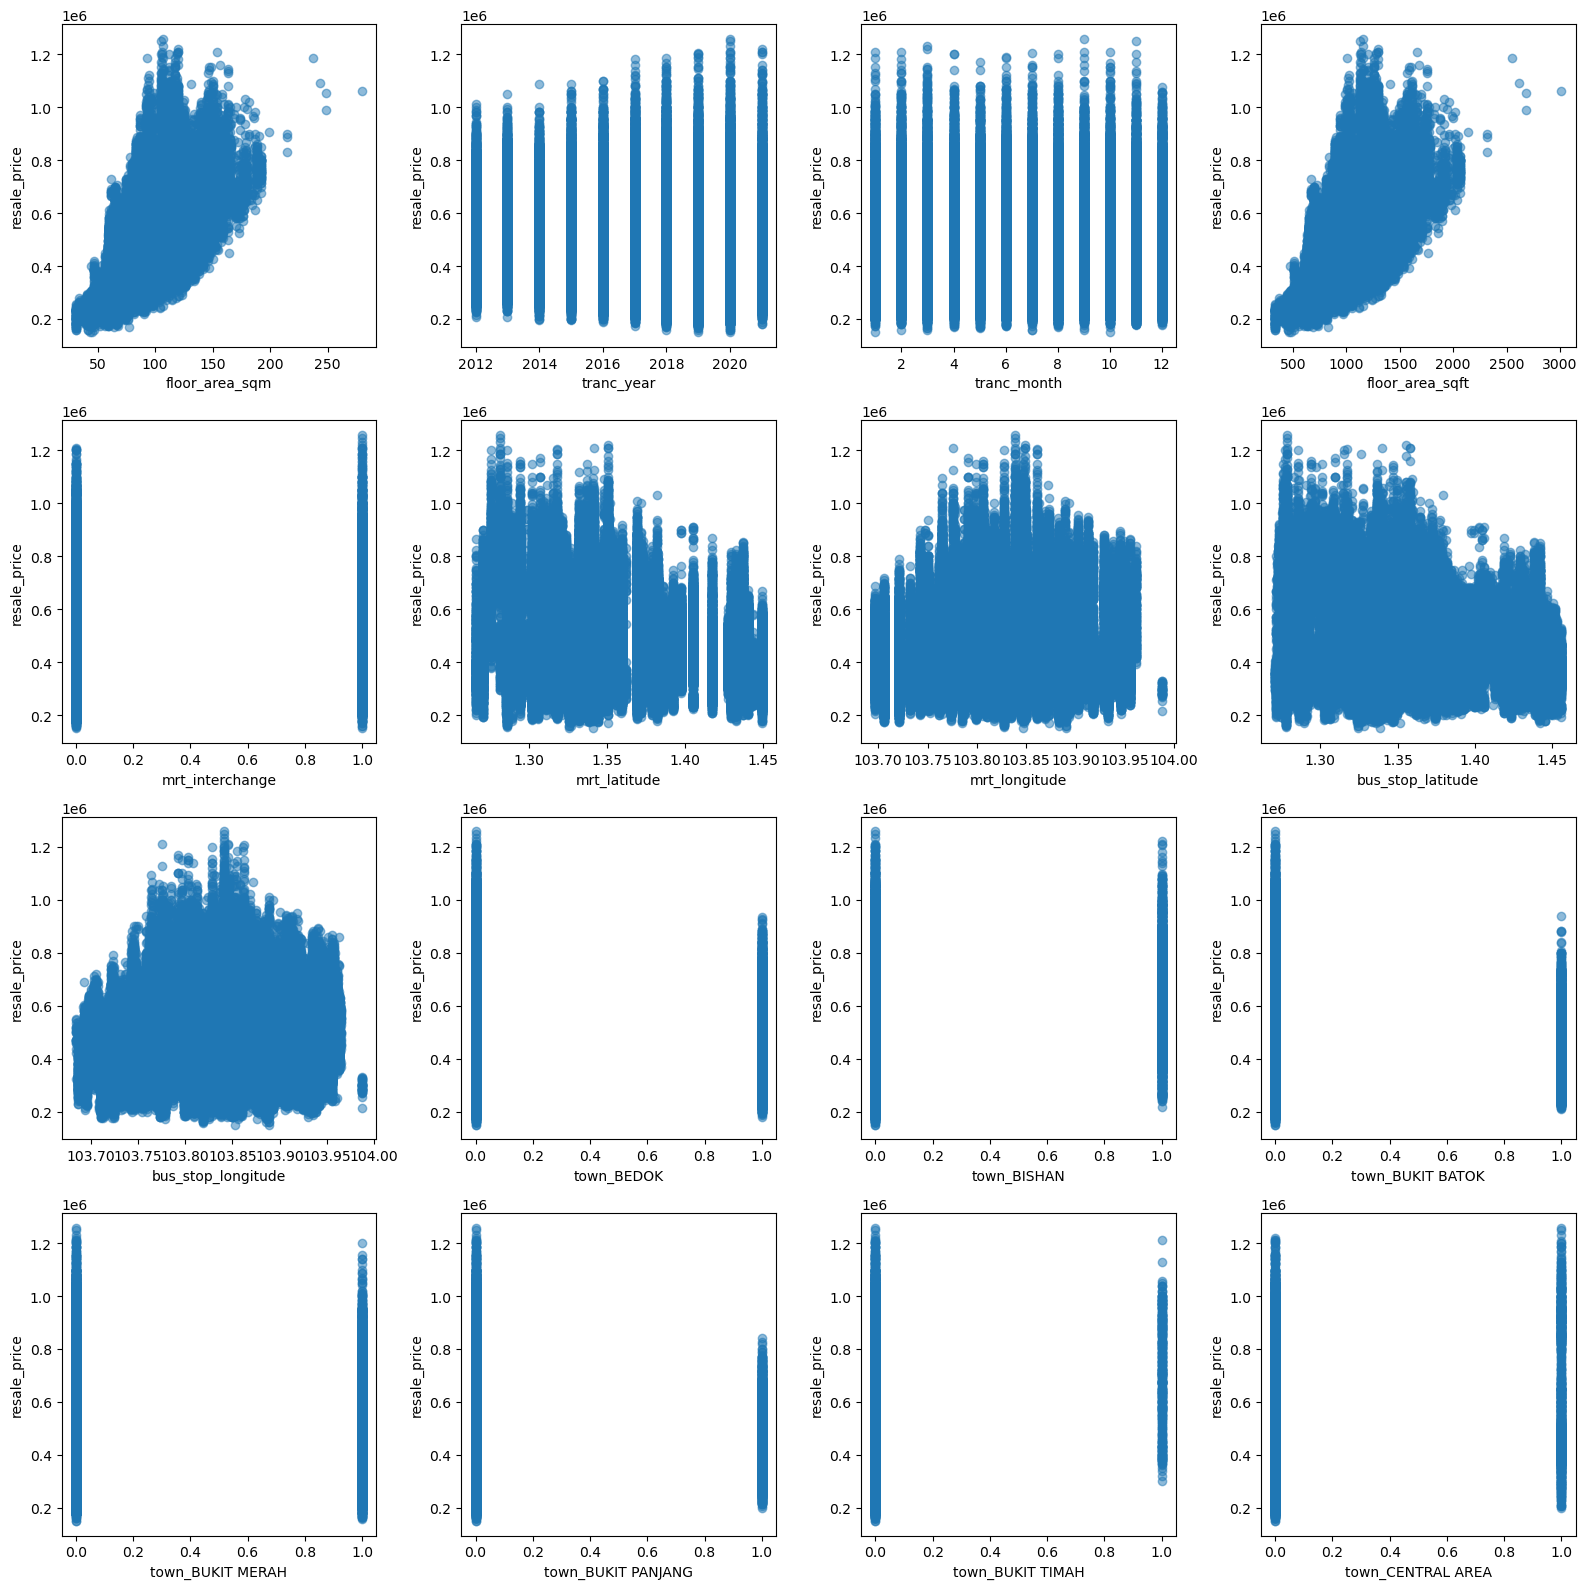

In [31]:
# Create subplots for multiple scatter plots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

# Extract the column names for X (independent) variables
x_columns = X.columns

# Loop through the columns and create scatter plots
for i, ax in enumerate(axes.ravel()):
    if i < len(x_columns):
        x_var = x_columns[i]
        ax.scatter(X[x_var], y, alpha=0.5)
        ax.set_xlabel(x_var)
        ax.set_ylabel('resale_price')
    
# Adjust layout
plt.tight_layout()
plt.show()